# Inverse Transform Sampling

This notebook covers the example of obtaining the exponential distribution from a sequence of random draws from a standard uniform distribution. But the idea can be generalised to any pair of distributions in so far as the CDF of the target distribution is invertible (hence the name).

The trick is to find an invertible transformation T such that $T(U) = X$, \
where $U \sim U[0,1]$ and $X \sim exp(\lambda)$

To that end: \
$F_X(x) = \mathbb{P}(X \leq x) = \mathbb{P}(T(U) \leq x) = \mathbb{P}(U \leq T^{-1}(x))$ \
In the case of the standard uniform distribution, this last expression simply becomes $T^{-1}(x)$

Therefore we have, $F_X(x) = T^{-1}(x)$ \
or likewise, $F_X^{-1}(x) = T(x)$

This is the crucial closed form relationship we will use in the sampling process.

We know that the exponential CDF is:

$$
F_X(x) =
\begin{cases}
0, & x < 0 \\
1 - e^{-\lambda x}, & x \ge 0
\end{cases}
$$

If we set $y = 1-e^{-\lambda x}$ and rearrange terms, we get \
$x = \frac{-\log(1-y)}{\lambda}$

In this context, we can rewrite it as: \
$x = \frac{-\log(1-u)}{\lambda}$

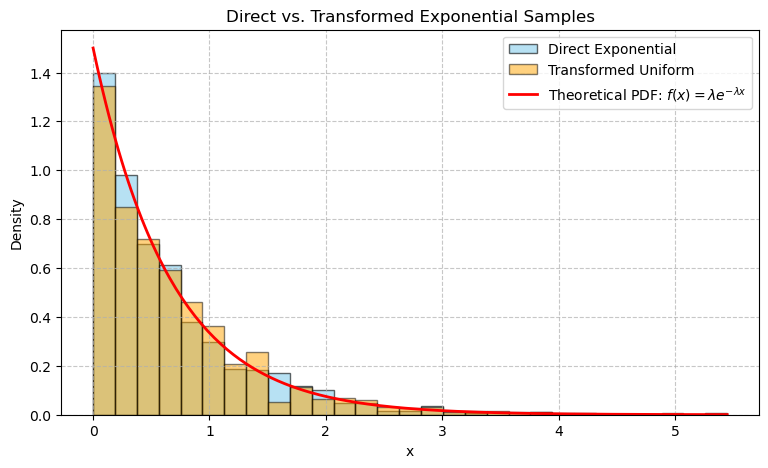

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kstest

# Parameters
lambda_param = 1.5
n_samples = 1000
np.random.seed(42)

# Direct exponential samples
samples_direct = np.random.exponential(scale=1/lambda_param, size=n_samples)

# Generate uniform(0,1) samples
u = np.random.uniform(0, 1, n_samples)

# Apply inverse transform
samples_transformed = -np.log(1 - u) / lambda_param

# Plot both histograms
plt.figure(figsize=(9, 5))
bins = np.linspace(0, max(samples_direct.max(), samples_transformed.max()), 30)

plt.hist(samples_direct, bins=bins, density=True, alpha=0.6, label='Direct Exponential', color='skyblue', edgecolor='black')
plt.hist(samples_transformed, bins=bins, density=True, alpha=0.5, label='Transformed Uniform', color='orange', edgecolor='black')

# Theoretical PDF
x = np.linspace(0, max(bins), 200)
pdf = lambda_param * np.exp(-lambda_param * x)
plt.plot(x, pdf, 'r-', linewidth=2, label=r'Theoretical PDF: $f(x)=\lambda e^{-\lambda x}$')

plt.title('Direct vs. Transformed Exponential Samples')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [27]:
# Kolmogorov–Smirnov test (two-sample)
ks_stat, p_value = kstest(samples_direct, samples_transformed)

print(f"K–S Test Statistic: {ks_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("The two samples are likely from the same distribution (fail to reject H₀).")
else:
    print("The two samples differ significantly (reject H₀).")

K–S Test Statistic: 0.0430
P-value: 0.3137
The two samples are likely from the same distribution (fail to reject H₀).
